# Laboratiorio Aprendizaje No Supervisado 2022
Utilizar la base de jugadores “players_22.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset. Considerar que la base 2022 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019. Realice comentarios en cada parte (verbose=True ;))

 **1.** Análisis exploratorio de la base.  
 **2.** Evaluación visual  e intuitiva de a dos variables numéricas por vez.  
 **3.** Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros  
 **4.** Evaluación y Análisis de los clusters encontrados.  
 **5.** Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?  
 **6.** Uso de alguna transformación (proyección, Embedding) para visualizar   los resultados y/o usarla como preprocesado para aplicar alguna técnica de   clustering


## Librerias

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

import seaborn
seaborn.set_context('talk')
pd.options.display.max_columns = None

## Lectura de dataset


In [166]:
url = 'https://drive.google.com/file/d/1DZPjisnW8eD8k4BE9UlQoenlv7t0Fg6L/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
players_22_df = pd.read_csv(dwn_url)
players_22_df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.



,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


## **1.** Analisis exploratorio de la base

In [167]:
print(len(players_22_df.columns), 'variables')

110 variables


In [168]:
players_22_df.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'moveme

In [169]:
interesting_columns = ['short_name','player_positions', 'overall', 'potential', 'value_eur','wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

In [170]:
players_22_df = players_22_df[interesting_columns]
players_22_df

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [171]:
players_22_df.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000000,56.000000,48.000000,57.000000,56.000000,57.000000,32.000000,44.000000,

Tipos de variables

In [172]:
players_22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 100 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   player_positions             19239 non-null  object 
 2   overall                      19239 non-null  int64  
 3   potential                    19239 non-null  int64  
 4   value_eur                    19165 non-null  float64
 5   wage_eur                     19178 non-null  float64
 6   age                          19239 non-null  int64  
 7   dob                          19239 non-null  object 
 8   height_cm                    19239 non-null  int64  
 9   weight_kg                    19239 non-null  int64  
 10  club_team_id                 19178 non-null  float64
 11  club_name                    19178 non-null  object 
 12  league_name                  19178 non-null  object 
 13  league_level   

**Realizamos el histograma de la variable "wage_eur" (salario en euros)**

In [173]:
print(players_22_df.wage_eur.max()-players_22_df.wage_eur.min()+1)
players_22_df['wage_eur']=players_22_df['wage_eur']/1000 #convierto columna en wage_eur_k
players_22_df['value_eur']=players_22_df['value_eur']/1000
players_22_df.rename(columns={"wage_eur": "wage_eur_k", "value_eur": "value_eur_k"},inplace=True)
players_22_df

349501.0


,short_name,player_positions,overall,potential,value_eur_k,wage_eur_k,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000.0,320.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500.0,270.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000.0,270.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000.0,270.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500.0,350.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

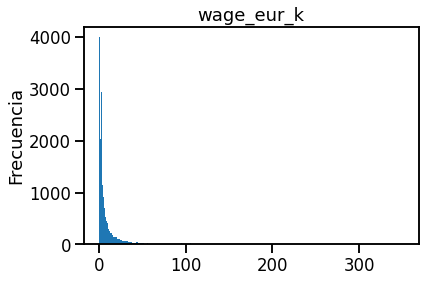

In [174]:
intervalos = range(int(players_22_df.wage_eur_k.min()-1), int(players_22_df.wage_eur_k.max() + 2)) #calculamos los extremos de los intervalos

plt.hist(x=players_22_df['wage_eur_k'], bins=intervalos)
plt.title('wage_eur_k')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

Observamos los jugadores con mayor salario por club de futbol y su edad

In [175]:
best_wage_player_per_club=players_22_df.iloc[players_22_df.groupby(players_22_df['club_name'])['wage_eur_k'].idxmax()][['club_name','short_name','wage_eur_k','age']].sort_values("wage_eur_k",ascending=False)
best_wage_player_per_club[:10]

,club_name,short_name,wage_eur_k,age
11,Real Madrid CF,K. Benzema,350.0,33
4,Manchester City,K. De Bruyne,350.0,30
0,Paris Saint-Germain,L. Messi,320.0,34
2,Manchester United,Cristiano Ronaldo,270.0,36
1,FC Bayern München,R. Lewandowski,270.0,32
16,Liverpool,S. Mané,270.0,29
30,FC Barcelona,S. Agüero,260.0,33
25,Chelsea,R. Lukaku,260.0,28
9,Tottenham Hotspur,H. Kane,240.0,27
83,Atlético de Madrid,A. Griezmann,220.0,30


Top 10 clubes con mejores promedio de Salario y edad

In [176]:
club_avg_wage=players_22_df.groupby("club_name")["wage_eur_k","age"].mean().reset_index().sort_values("wage_eur_k",ascending=False)
club_avg_wage.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,club_name,wage_eur_k,age
509,Real Madrid CF,133.151515,25.000000
411,Manchester City,112.825000,24.312500
412,Manchester United,103.242424,25.848485
239,FC Barcelona,97.878788,24.151515
403,Liverpool,97.303030,25.000000
470,Paris Saint-Germain,90.909091,25.939394
135,Chelsea,90.242424,24.818182
358,Inter,85.142857,28.071429
368,Juventus,74.461538,26.307692
241,FC Bayern München,72.714286,24.785714


## **2.** Evaluación visual e intuitiva de a dos variables numéricas por vez.

### Preparamos los datos

Elegimos variables numericas

In [177]:
num_var = ['overall', 'potential', 'value_eur_k','wage_eur_k', 'age', 'height_cm', 'weight_kg',
       'skill_moves','release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic','attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

Elegimos los jugadores con un salario mayor a la media

In [178]:
best_wage = players_22_df['wage_eur_k'] >= players_22_df['wage_eur_k'].mean()

In [179]:
players_22_df['wage_eur_k'].mean()

9.017989362811555

Comparamos la relacion de la edad con el mayor sueldo

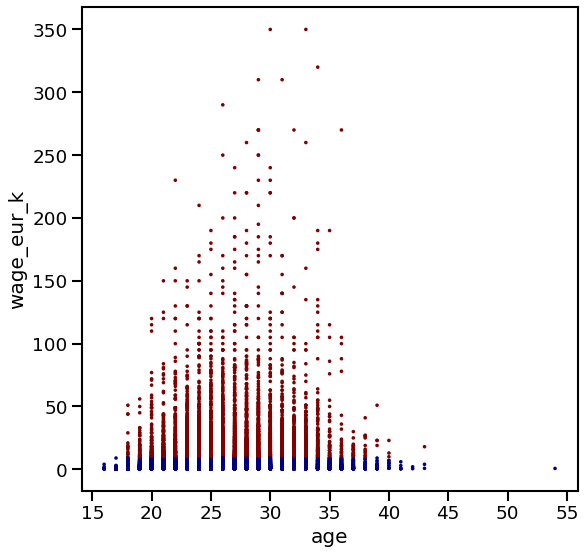

In [180]:
skill_1='age'
skill_2='wage_eur_k'
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(players_22_df[skill_1], y=players_22_df[skill_2],s=3,c=best_wage,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

Observamos que la mayoria de los jugadores siguen una distribucion normal del salario respecto a la edad, aunque tambien se ven que son pocos los que tienen salarios superiores. Esto sugiere el comportamiento exponencial que se visualizo anteriromente de la variable salario.

Aqui podriamos ver los grupos de defensores mediocampistas y delanteros

In [181]:
club_pos = players_22_df['club_position'] != 'GK'

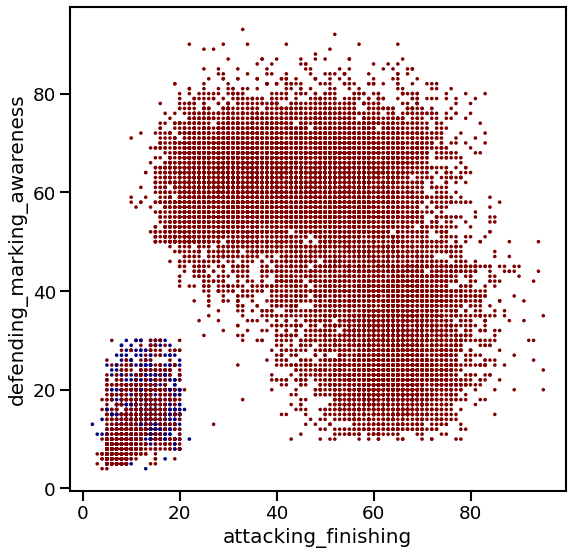

In [182]:
skill_1='attacking_finishing'
skill_2='defending_marking_awareness'
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(players_22_df[skill_1], y=players_22_df[skill_2],s=3,c=club_pos,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

Se observa que de los jugadores de campo tienen mayores tendencias ofensivas que defensivas

Nos quedamos con los jugadores con salario mayor o igual a la media

In [183]:
players_22_df_bs = players_22_df[(players_22_df['wage_eur_k'] >= players_22_df['wage_eur_k'].mean())] # jugadores con salario mayor o igual a la media
players_22_df_bs.reset_index(inplace = True, drop = True)
players_22_df_bs

,short_name,player_positions,overall,potential,value_eur_k,wage_eur_k,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000.0,320.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500.0,270.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000.0,270.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000.0,270.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500.0,350.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## **3.** Uso de dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Elección justificada de hiper-parámetros
## **4.** Evaluación y Análisis de los clusters encontrados

In [184]:
players_22_df_num = players_22_df_bs.copy()
players_22_df_num.dropna(subset=num_var,inplace=True)
players_22_df_num

,short_name,player_positions,overall,potential,value_eur_k,wage_eur_k,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000.0,320.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500.0,270.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000.0,270.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000.0,270.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500.0,350.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [185]:
len(num_var)

49

Para calcular la cantidad optima de clusters utilizamos el metodo del codo.


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

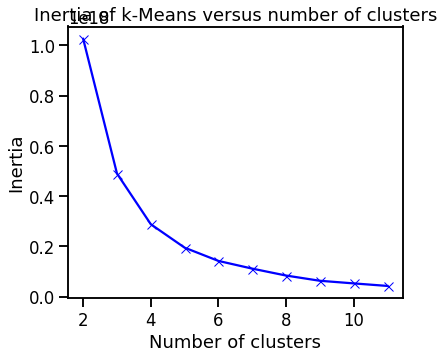

In [186]:
scores = [KMeans(n_clusters=i).fit(players_22_df_num[num_var]).inertia_ for i in range(2,12)]

plt.figure(figsize=(6,5))
plt.plot(np.arange(2, 12), scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Se observa del grafico que el numero de clusters optimos es de 4.

### Clustering-con-Kmeans

In [187]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#Se selecciona la cantidad de clusters obtenidas anteriormente
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(players_22_df_num[num_var])

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [188]:
print(len(clusters))

3565


In [189]:
df_clusters=players_22_df_num.copy()
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters')
df_clusters.head(4)

Kmeans encontró:  4 clusters


,short_name,player_positions,overall,potential,value_eur_k,wage_eur_k,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,kmeans_5
0,L. Messi,"RW, ST, CF",93,93,78000.0,320.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,2
1,R. Lewandowski,ST,92,92,119500.0,270.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,2
2,Cristiano Ronaldo,"ST, LW",91,91,45000.0,270.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,1
3,Neymar Jr,"LW, CAM",91,91,129000.0,270.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,2


In [190]:
df_clusters.describe()

,overall,potential,value_eur_k,wage_eur_k,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,kmeans_5
count,3565.00000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,427.000000,427.000000,3565.000000,3565.000000,3565.000000,3.565000e+03,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.00000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,3565.000000,0.0,3565.000000
mean,74.36101,76.870407,9684.873773,31.681346,27.034222,181.062833,75.330435,22499.069846,1.110799,18.181487,2023.376438,48.727910,9832.634660,12.611241,3.177840,2.910799,1.391024,1.846507e+07,70.709677,61.139130,66.287798,70.703506,58.418233,70.342777,62.929593,58.569425,63.543619,71.753436,55.122581,69.757644,61.318373,53.781487,65.586816,72.430295,70.552034,70.817952,70.33352,71.686957,68.391024,68.681907,69.367181,73.185694,70.157083,60.844320,67.371108,57.897896,63.896774,64.832539,58.010379,70.396353,57.618233,58.667882,55.433941,10.488359,10.576718,10.595231,10.486957,10.532118,NaN,0.581206
std,4.29432,4.871702,14626.870233,33.523456,3.914269,6.524277,6.863850,43413.333477,0.313928,16.354206,1.213331,38.672435,28853.854329,6.739183,0.699376,0.728919,0.687575,2.818842e+07,11.750236,13.796775,8.639895,8.190486,17.557740,8.365948,13.460644,16.494464,11.963779,6.622418,15.738262,10.272666,14.923596,16.158870,9.876459,7.142213,12.350084,12.023999,12.32658,6.136235,12.900323,11.542573,12.164860,9.990358,11.530203,15.306012,13.010270,19.734921,14.633322,11.997089,13.315019,7.509010,18.927867,20.064016,20.697284,3.019427,3.070453,3.091792,3.118257,3.096084,NaN,1.124383
min,57.00000,65.000000,275.000000,10.000000,18.000000,161.000000,55.000000,1.000000,1.000000,2.000000,2021.000000,1.000000,1318.000000,2.000000,1.000000,2.000000,1.000000,4.680000e+05,30.000000,18.000000,35.000000,35.000000,17.000000,35.000000,15.000000,12.000000,20.000000,45.000000,11.000000,24.000000,18.000000,10.000000,22.000000,33.000000,27.000000,30.000000,29.00000,43.000000,27.000000,20.000000,30.000000,31.000000,29.000000,12.000000,24.000000,10.000000,12.000000,17.000000,13.000000,44.000000,10.000000,11.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,0.000000
25%,72.00000,73.000000,2300.000000,14.000000,24.000000,176.000000,70.000000,86.000000,1.000000,8.000000,2022.000000,21.000000,1336.000000,7.000000,3.000000,2.000000,1.000000,4.200000e+06,64.000000,52.000000,61.000000,67.000000,41.000000,66.000000,56.000000,47.000000,55.000000,67.000000,43.000000,65.000000,52.000000,41.000000,60.000000,68.000000,64.000000,65.000000,64.00000,68.000000,61.000000,63.000000,62.000000,68.000000,64.000000,54.000000,60.000000,40.000000,58.000000,58.000000,48.000000,66.0000

Definimos que un sueldo mayor a 85k correspone a un jugador caro

In [191]:
bool_mostexpensive=df_clusters["wage_eur_k"] > 200
bool_no_mostexpensive=df_clusters["wage_eur_k"]<=200

#Eligo dos números entre 0 y  de n_skills-1
# En este caso mas que skills son atributos
skill_1='wage_eur_k'
skill_2='release_clause_eur'

In [192]:
kmean_clusters = go.Scatter(x=players_22_df_num[skill_1], y=players_22_df_num[skill_2],
                           mode='markers',
                        text=players_22_df_num.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=players_22_df_num.loc[bool_mostexpensive,skill_1], y=players_22_df_num.loc[bool_mostexpensive,skill_2],name='Most expensive!!',
                      text=players_22_df_num.loc[bool_mostexpensive,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Observamos que hay 4 clusters bien definidos considerando el sueldo y la clausula de recision en euros de los jugadores.

- Vemos que en el Cluster azul encontramos jugadores con baja clausula de recision y bajos salarios los cuales se comprimen en la parte inferior del grafico.

- Por otro lado el Cluster rojo agrupa jugadores con clausulas de recision medias aunque mantienen salarios bastantes bajos, podriamos considerar que son jugadores con proyeccion que los clubes buscan que se les pague lo suficiente como para dejarlos ir.

- El Cluster verde agrupa jugadores de gran rendimiento, que podriamos considerar que tienen proyeccion internacional. Se puede decir que son jugadores de transferencias altas.

- El Cluster naranja agrupa jugadores que tienen un enorme valor en el mercado y podriamos definir con el status de crack. Son jugadores determinantes en sus equipos y eso se refleja en su valor del mercado| 

### Clustering-Mean-Shift 


- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media). (Ejercicio: Probar con varios)

In [193]:
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth

In [194]:
players_22_df_num.reset_index(drop=True,inplace=True)
#players_22_df_num

Reducimos la tabla en concideracion de los skills y atributos mas importante en un futbolista

In [195]:
players_22_df_num

,short_name,player_positions,overall,potential,value_eur_k,wage_eur_k,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000.0,320.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500.0,270.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000.0,270.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000.0,270.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5,5,5,High/Medium,Unique,Yes,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500.0,350.0,30,1991-06-28,181,70,10.0,Manchester City,English Premier League,1.0,RCM,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5,4,4,High/High,Unique,Yes,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [196]:
'''new_skills = ['overall',	'potential',	'value_eur_k',	'wage_eur_k',	'age',	'height_cm',	'weight_kg',	'skill_moves','release_clause_eur','pace','shooting','passing','dribbling','defending','physic',
              'skill_dribbling',	'skill_curve'	,'skill_ball_control'	,'movement_acceleration',	'movement_sprint_speed',	'movement_agility',	'movement_reactions',	'movement_balance',	'power_jumping',
              'power_strength',	'mentality_aggression','mentality_interceptions',	'mentality_positioning',	'mentality_vision',	'mentality_penalties',	'mentality_composure'	]'''


"new_skills = ['overall',\t'potential',\t'value_eur_k',\t'wage_eur_k',\t'age',\t'height_cm',\t'weight_kg',\t'skill_moves','release_clause_eur','pace','shooting','passing','dribbling','defending','physic',\n              'skill_dribbling',\t'skill_curve'\t,'skill_ball_control'\t,'movement_acceleration',\t'movement_sprint_speed',\t'movement_agility',\t'movement_reactions',\t'movement_balance',\t'power_jumping',\n              'power_strength',\t'mentality_aggression','mentality_interceptions',\t'mentality_positioning',\t'mentality_vision',\t'mentality_penalties',\t'mentality_composure'\t]"

Para asegurarse de que los datos seguirán una distribución gaussiana normalizamos la base

In [197]:
scalerFD = StandardScaler()  
M_scaled = scalerFD.fit_transform(players_22_df_num[num_var])  
M_normalized = normalize(M_scaled)  
M_normalized = pd.DataFrame(M_normalized)
M_normalized.columns = players_22_df_num[num_var].columns
M_normalized.head()

,overall,potential,value_eur_k,wage_eur_k,age,height_cm,weight_kg,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.247617,0.188884,0.266451,0.490655,0.101525,-0.096735,-0.027681,0.085247,0.254673,0.069382,0.127609,0.163175,0.169233,-0.079341,-0.036434,0.093540,0.126003,0.030787,0.165802,0.119177,0.145738,0.121112,0.141993,0.146794,0.188267,0.094457,0.043565,0.095648,0.207448,0.117674,0.085595,-0.006412,-0.006771,-0.005725,0.123580,-0.102481,-0.051739,0.113462,0.143455,0.072794,0.194523,-0.113383,-0.067297,-0.086644,-0.084804,0.007865,0.081276,0.064272,-0.046658
1,0.246875,0.186657,0.451241,0.427275,0.076249,0.036270,0.049645,0.089810,0.381098,0.037290,0.134440,0.088432,0.112248,-0.049356,0.083749,0.036035,0.132747,0.132911,0.120222,0.129375,0.089180,0.071211,0.116118,0.026856,0.131022,0.031380,0.040899,0.032505,0.208757,0.063405,0.111005,0.077237,0.016931,0.082584,0.102707,0.062961,-0.027099,0.127750,0.080996,0.144399,0.140902,-0.071822,-0.049930,-0.105801,0.089807,-0.089588,0.027308,-0.047935,-0.010330
2,0.262283,0.196330,0.163436,0.481224,0.155051,0.061601,0.075638,0.194016,0.155696,0.093847,0.161228,0.107433,0.142951,-0.094142,0.037683,0.121047,0.149508,0.149692,0.084294,0.132807,0.120209,0.089274,0.126590,0.078225,0.147566,0.079191,0.096731,0.086033,0.246147,0.029432,0.148479,0.142635,0.025845,0.040174,0.142211,-0.022743,-0.099122,0.143880,0.063011,0.152464,0.221796,-0.120229,-0.089972,-0.102807,-0.078205,0.009332,0.096439,0.076262,0.010230
3,0.213055,0.159481,0.448542,0.390902,0.027615,-0.051098,-0.058725,0.157601,0.429610,0.094951,0.087126,0.125454,0.156401,-0.067077,-0.048262,0.090158,0.081443,-0.002499,0.118291,0.107881,0.135116,0.098310,0.113039,0.085812,0.173761,0.099946,0.083148,0.114494,0.155142,0.066532,0.053917,-0.024260,0.043010,-0.081821,0.072409,-0.018474,-0.058227,0.083056,0.115351,0.144496,0.165522,-0.065708,-0.073085,-0.070228,-0.027105,-0.028236,0.078338,0.079582,0.008310
4,0.207406,0.155252,0.423841,0.508279,0.040558,-0.000516,-0.041570,0.079987,0.405877,0.024100,0.096456,0.165497,0.113041,0.017017,0.048994,0.123558,0.076039,-0.038226,0.179819,0.091416,0.095058,0.084943,0.096791,0.148576,0.139175,0.023613,0.023070,0.037635,0.168476,0.039872,0.103501,-0.028017,0.084734,0.017841,0.105462,0.035502,0.021976,0.088170,0.130140,0.100463,0.132619,0.029360,0.016894,-0.006295,0.079983,0.042246,-0.096872,-0.008359,0.042668


In [198]:
bandwidth = estimate_bandwidth(M_normalized, quantile=0.03, random_state=0)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(M_normalized)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : {} (bandwidth = {})".format(n_clusters_, bandwidth))

Cantidad de clusters encontrados por Mean Shift : 2 (bandwidth = 0.8808035627364925)


In [199]:
M_normalized

,overall,potential,value_eur_k,wage_eur_k,age,height_cm,weight_kg,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.247617,0.188884,0.266451,0.490655,0.101525,-0.096735,-0.027681,0.085247,0.254673,0.069382,0.127609,0.163175,0.169233,-0.079341,-0.036434,0.093540,0.126003,0.030787,0.165802,0.119177,0.145738,0.121112,0.141993,0.146794,0.188267,0.094457,0.043565,0.095648,0.207448,0.117674,0.085595,-0.006412,-0.006771,-0.005725,0.123580,-0.102481,-0.051739,0.113462,0.143455,0.072794,0.194523,-0.113383,-0.067297,-0.086644,-0.084804,0.007865,0.081276,0.064272,-0.046658
1,0.246875,0.186657,0.451241,0.427275,0.076249,0.036270,0.049645,0.089810,0.381098,0.037290,0.134440,0.088432,0.112248,-0.049356,0.083749,0.036035,0.132747,0.132911,0.120222,0.129375,0.089180,0.071211,0.116118,0.026856,0.131022,0.031380,0.040899,0.032505,0.208757,0.063405,0.111005,0.077237,0.016931,0.082584,0.102707,0.062961,-0.027099,0.127750,0.080996,0.144399,0.140902,-0.071822,-0.049930,-0.105801,0.089807,-0.089588,0.027308,-0.047935,-0.010330
2,0.262283,0.196330,0.163436,0.481224,0.155051,0.061601,0.075638,0.194016,0.155696,0.093847,0.161228,0.107433,0.142951,-0.094142,0.037683,0.121047,0.149508,0.149692,0.084294,0.132807,0.120209,0.089274,0.126590,0.078225,0.147566,0.079191,0.096731,0.086033,0.246147,0.029432,0.148479,0.142635,0.025845,0.040174,0.142211,-0.022743,-0.099122,0.143880,0.063011,0.152464,0.221796,-0.120229,-0.089972,-0.102807,-0.078205,0.009332,0.096439,0.076262,0.010230
3,0.213055,0.159481,0.448542,0.390902,0.027615,-0.051098,-0.058725,0.157601,0.429610,0.094951,0.087126,0.125454,0.156401,-0.067077,-0.048262,0.090158,0.081443,-0.002499,0.118291,0.107881,0.135116,0.098310,0.113039,0.085812,0.173761,0.099946,0.083148,0.114494,0.155142,0.066532,0.053917,-0.024260,0.043010,-0.081821,0.072409,-0.018474,-0.058227,0.083056,0.115351,0.144496,0.165522,-0.065708,-0.073085,-0.070228,-0.027105,-0.028236,0.078338,0.079582,0.008310
4,0.207406,0.155252,0.423841,0.508279,0.040558,-0.000516,-0.041570,0.079987,0.405877,0.024100,0.096456,0.165497,0.113041,0.017017,0.048994,0.123558,0.076039,-0.038226,0.179819,0.091416,0.095058,0.084943,0.096791,0.148576,0.139175,0.023613,0.023070,0.037635,0.168476,0.039872,0.103501,-0.028017,0.084734,0.017841,0.105462,0.035502,0.021976,0.088170,0.130140,0.100463,0.132619,0.029360,0.016894,-0.006295,0.079983,0.042246,-0.096872,-0.008359,0.042668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3560,-0.346468,-0.120334,-0.072292,-0.077847,-0.154805,0.072637,0.046814,0.014730,-0.070734,-0.027757,-0.062283,-0.059735,-0.083818,-0.160542,-0.220746,-0.088791,-0.040642,-0.176504,-0.050045,-0.062121,-0.055746,-0.091288,-0.057964,0.029410,-0.091515,-0.015126,-0.038220,-0.013021,-0.562712,-0.040970,-0.111391,-0.122368,-0.195009,-0.137349,-0.038096,-0.197717,-0.182351,-0.138984,-0.018386,-0.054333,-0.054442,-0.150193,-0.135987,-0.118834,-0.218787,-0.101011,0.015758,-0.095998,0.173697
3561,-0.366784,-0.064622,-0.068122,-0.070934,-0.197099,-0.152353,-0.165071,0.013422,-0.066009,-0.090631,-0.128299,-0.041737,-0.089766,-0.058833,-0.345355,-0.048315,-0.116826,-0.206669,-0.078725,-0.063574,-0.093503,-0.009689,0.

In [200]:
bool_mostexpensive=M_normalized["wage_eur_k"] > 0.5
bool_no_mostexpensive=M_normalized["wage_eur_k"]<=0.5

#Eligo dos números entre 0 y  de n_skills-1
# En este caso mas que skills son atributos
skill_1='wage_eur_k'
skill_2='release_clause_eur'

In [201]:
data=[]
MeanShift_clusters = go.Scatter(x=M_normalized[skill_1], y=M_normalized[skill_2],
                           mode='markers',
                        text=players_22_df_num.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=M_normalized.loc[bool_mostexpensive,skill_1], y=M_normalized.loc[bool_mostexpensive,skill_2],name='Top players',
                      text=players_22_df_num.loc[bool_mostexpensive,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



En este caso observamos que el agrupamiento no es significativo en relacion a las variables que estamos considerando pero si observamos los clusters en detalle podemos distinguir que el algoritmo de MeanShifts hace una diferenciacion entre jugadores con tendencias ofensivas y jugadores con tendencias defensivas.

- Cluster Azul, jugadores con tendencias ofensiva. 

- Cluster Rojo, jugadores con tendencias defensivas.



## **5.** Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

En la aplicacion de Clustering con Mean-Shift se aplico una normalizacion  para asegurarnos de que los datos seguirán una distribución gaussiana normalizamos la base

## **6.** Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

Usaremos t-SNE : t-distributed Stochastic Neighbor Embedding.

t-SNE es una herramienta para visualizar datos altamente dimensionales.

Los "proyecta" en menos dimensiones (2D o 3D) manteniendo la distancia entre ellos.

In [202]:
from sklearn.manifold import TSNE

In [203]:
tsne = TSNE(n_components=2, verbose=1, random_state=0)
X_tsne = tsne.fit_transform(M_normalized)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3565 samples in 0.000s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computed neighbors for 3565 samples in 0.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3565
[t-SNE] Computed conditional probabilities for sample 2000 / 3565
[t-SNE] Computed conditional probabilities for sample 3000 / 3565
[t-SNE] Computed conditional probabilities for sample 3565 / 3565
[t-SNE] Mean sigma: 0.254008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.544525
[t-SNE] KL divergence after 1000 iterations: 1.992798


In [204]:
data=[]

bool_mostexpensive=M_normalized["wage_eur_k"] > 0.5
#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=players_22_df_num.loc[:,'player_positions'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )
		
crack =go.Scatter(x=X_tsne[bool_mostexpensive,0], y=X_tsne[bool_mostexpensive,1],name='Los más caros',
                      text=players_22_df_num.loc[bool_mostexpensive,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
#plot(fig)

In [205]:
fig.show(renderer="colab")